In [1]:
import pandas as pd
import math
from datetime import datetime
import numpy as np
import re
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
Behaviors= pd.read_excel("Behaviors.xlsx",index_col=0)  
Bins= pd.read_excel("Bins.xlsx",index_col=0)  
Infrastructures= pd.read_excel("Infrastructures.xlsx",index_col=0)   

In [3]:
Infrastructures = Infrastructures.reset_index()
Bins = Bins.reset_index()

In [4]:
bins_mapping = {
    'זמן סיום מהמערכת' : 'End_Time',
    'יישוב': 'City',
    'סמל_יישוב': 'City_Code',
    'שעת הגעה לנקודה': 'Arrival_Time',
    'נ.צ כתובת': 'Coordinate_Address',
    'כתובת תיאור מיקום נקודת המדידה': 'Measurement_Point_Description',
    'סוגנ קודת המדידה': 'Point_Type',
    'האם יש פחים בנקודת המדידה': 'Has_Bins',
    'כמה פחים יש בנקודת המדידה': 'Bin_Count',
    'סוג': 'Type',
    'מצב הפח': 'Bin_Condition',
    'מפלס הפסולת בפח': 'Waste_Level',
    'מפלס הפסולת בפח במספר': 'Waste_Level_Number'
}

infrastructures_mapping = {
    'זמןסיוםמהמערכת' : 'End_Time',
    'יישוב': 'City',
    'סמל_יישוב': 'City_Code',
    'שעתהגעהלנקודה': 'Arrival_Time',
    'נ.צכתובת': 'Coordinate_Address',
    'כתובתתיאורמיקוםנקודתהמדידה': 'Measurement_Point_Description',
    'התרשמותכלליתמנקודתהמדידה': 'General_Impression',
    'מדרכה': 'Sidewalk',
    'אבנישפה': 'Curb',
    'גדרות': 'Fences',
    'צמחייה': 'Vegetation',
    'הערות': 'Remarks',
    'point_type': 'Point_Type'
}

Behaviors_mapping = {
    'זמןסיוםמהמערכת' : 'End_Time',
    'יישוב': 'City',
    'סמל_יישוב': 'City_Code',
    'שעתהגעהלנקודה': 'Arrival_Time',
    'נ.צכתובת': 'Coordinate_Address',
    'כתובתתיאורמיקוםנקודתהמדידה': 'Measurement_Point_Description',
}


In [5]:
bins_renamed = Bins.rename(columns=bins_mapping)
Behaviors_renamed = Behaviors.rename(columns=Behaviors_mapping)
infrastructures_renamed = Infrastructures.rename(columns=infrastructures_mapping)

In [6]:
Behaviors_renamed = Behaviors_renamed.drop(['City','gender','age','point_type','Arrival_Time','Coordinate_Address','time','parit','teortext','סוגנקודתהמדידהתשובה','Index1', 'heged1','heged2','heged3','heged4','heged5','heged6', 'heged7', 'heged8', 'heged9', 'heged10', 'heged11', 'heged12','heged13'], axis =1)
infrastructures_renamed = infrastructures_renamed.drop(['City', 'Arrival_Time','Coordinate_Address','Remarks'], axis=1)

In [7]:
Behaviors_renamed['teorshlilihiyuvi'] = Behaviors_renamed['teorshlilihiyuvi'].replace('שלילית', 'negative')
Behaviors_renamed['teorshlilihiyuvi'] = Behaviors_renamed['teorshlilihiyuvi'].replace('חיובית', 'positive')

In [8]:
Behaviors_renamed['Measurement_Point_Description'] = Behaviors_renamed['Measurement_Point_Description'].str.replace(r'[A-Za-z0-9_\n]', '', regex=True)
infrastructures_renamed['Measurement_Point_Description'] = infrastructures_renamed['Measurement_Point_Description'].str.replace(r'[A-Za-z0-9_\n]', '', regex=True)

In [9]:
Behaviors_renamed['End_Time'] = pd.to_datetime(Behaviors_renamed['End_Time'])
Behaviors_renamed['Date'] = Behaviors_renamed['End_Time'].dt.date

infrastructures_renamed['End_Time'] = pd.to_datetime(infrastructures_renamed['End_Time'])
infrastructures_renamed['Date'] = infrastructures_renamed['End_Time'].dt.date


In [10]:
Behaviors_renamed = Behaviors_renamed.drop(['End_Time'], axis =1)
infrastructures_renamed = infrastructures_renamed.drop(['End_Time'], axis =1)

From the Behaviors data, we want to know how many negative and positive behaviors there is per point and date

In [11]:
Behaviors_renamed.isnull().sum()

City_Code                          0
Measurement_Point_Description      0
teorshlilihiyuvi                 245
Date                               0
dtype: int64

In [12]:
Behaviors_drops = Behaviors_renamed.dropna()

# we dont have a way to fill nulls in the main column 

In [13]:
# count how many negative / positive per row, and fill 0 where we dont have a data for negative / positive for a row
aggregated_behaviors = Behaviors_renamed.groupby(["City_Code", "Measurement_Point_Description", "Date"])["teorshlilihiyuvi"].value_counts().unstack(fill_value=0).reset_index()


In [14]:
aggregated_behaviors

teorshlilihiyuvi,City_Code,Measurement_Point_Description,Date,negative,positive
0,2,אור הגנוז,2021-07-20,8,3
1,2,אשכול גנים טפחות,2021-07-20,1,2
2,2,בר יוחאי - מרכז הישוב,2021-07-21,2,0
3,2,גן שעשועים אור הגנוז,2021-07-20,4,0
4,2,חנייה קבר הרשב״י,2021-07-20,12,7
...,...,...,...,...,...
1493,9600,משה שרת,2021-07-20,2,1
1494,9600,פארק אשר,2021-07-21,4,1
1495,9600,פארק סביוני ים,2021-07-22,1,2
1496,9600,רחוב מגורים,2021-07-21,1,0


For the infrastructures columns, we renamd the values to english for later use.

In [15]:
status_mapping_dict = {
    'לא תקין (מוזנח)': 'poor',
    'סביר': 'good',
    'תקין (מטופח)': 'great',
    'לא רלוונטי':  pd.NA 
}

columns_to_replace = ["Sidewalk", "Curb", "Fences", "Vegetation"]

infrastructures_renamed[columns_to_replace]=infrastructures_renamed[columns_to_replace].replace(status_mapping_dict)


In [16]:
most_common = infrastructures_renamed.groupby('City_Code')[["Sidewalk", "Curb", "Fences", "Vegetation"]].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None)
for col in ['Sidewalk', 'Curb', 'Fences', 'Vegetation']:
    infrastructures_renamed[col] = infrastructures_renamed.apply(
        lambda row: most_common.at[row['City_Code'], col] 
        if pd.isna(row[col]) and row['City_Code'] in most_common.index 
        else row[col], axis=1
    )

In [17]:
data_for_unsupervised = infrastructures_renamed.dropna()

In [18]:
data_for_unsupervised = pd.merge(data_for_unsupervised, aggregated_behaviors, on=[
    "City_Code", "Measurement_Point_Description", "Date"], how='inner')	

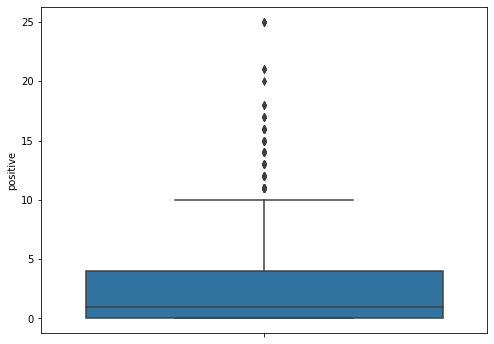

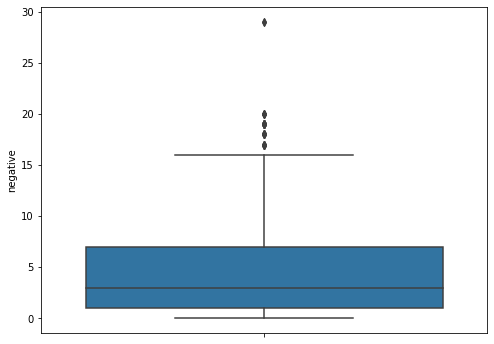

In [19]:
for col in ['positive', 'negative']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data_for_unsupervised, y=col)  
    plt.show()
## Doesn't seem like a daramatic outlires

In [20]:
for col in data_for_unsupervised.columns:
    if col not in ['Measurement_Point_Description', 'Point_Type']:
        if data_for_unsupervised[col].dtype not in ['int64', 'float64', 'datetime64[ns]']:
            data_for_unsupervised[col] = data_for_unsupervised[col].astype('category')

In [21]:
#### SAME AS FOR CLASSIFICATIONS ####

## Dates Fetching
data_for_unsupervised['Day_Of_Week'] = data_for_unsupervised.Date.dt.dayofweek
data_for_unsupervised['Month'] = data_for_unsupervised.Date.dt.month

data_for_unsupervised = data_for_unsupervised.drop(['Date'], axis=1)
data_for_unsupervised[['Month', 'Day_Of_Week']] = data_for_unsupervised[['Month', 'Day_Of_Week']] = data_for_unsupervised[['Month', 'Day_Of_Week']].astype('category')

## Fetching Point_type
data_for_unsupervised[['Point_Type']] = data_for_unsupervised[['Point_Type']] = data_for_unsupervised[['Point_Type']].astype('category')

## City Fetching - Avoiding OverFitting
economical_status = pd.read_excel("economical_status.xlsx")  
economical_status = economical_status[economical_status['Unnamed: 2'].notnull()].reset_index()
economical_status = economical_status.iloc[1:, [2, 7, 9]]
columns_rename_e = ['City_Code','Area_code', 'Economical_Rate']
economical_status.columns = columns_rename_e
economical_status['Economical_Rate'] = economical_status['Economical_Rate'].astype('Float64')
economical_status = economical_status.groupby(['City_Code'], as_index=False).agg({'Economical_Rate': 'mean'})
economical_status

## City Fetching - Avoiding OverFitting
location_rank = pd.read_excel("location_rank.xlsx")  
location_rank = location_rank.iloc[6:, [3, 9]]
columns_rename_l = ['City_Code','Location_Rate']
location_rank.columns = columns_rename_l
location_rank['Location_Rate'] = location_rank['Location_Rate'].astype('Float64')
location_rank = location_rank.groupby(['City_Code'], as_index=False).agg({'Location_Rate': 'mean'})
location_rank

## City Fetching - Avoiding OverFitting
data_for_unsupervised = pd.merge(data_for_unsupervised, economical_status, on=[
    "City_Code"], how='inner')
data_for_unsupervised = pd.merge(data_for_unsupervised, location_rank, on=[
    "City_Code"], how='inner')
len(data_for_unsupervised)

924

In [22]:
## Street Fetching - Avoiding OverFitting 
def classify_street(street):
    if any(keyword in street for keyword in ['דיין', 'הרצל', 'גוריון', 'רוטשילד', 'בגין', 'דיזינגוף']):
        return 'Main'
    if any(keyword in street for keyword in ['פארק', 'גן']):
        return 'Park'
    if any(keyword in street for keyword in ['קניון', 'מרכז מסחרי', 'שוק']):
        return 'Commercial'
    if any(keyword in street for keyword in ['תחנת דלק', 'תחנת רכבת']):
        return 'Transportation'
    if any(keyword in street for keyword in ['בית ספר', 'מתנ"ס', 'קופת חולים']):
        return 'Public Facility'
    if any(keyword in street for keyword in [
    'מכללת' , 'שדרה', 'דרך', 'מרכז', 'מכללה', 'טיילת', 'כיכר']):  
        return 'Popular'
    return 'Other'

data_for_unsupervised['Street_Group'] = data_for_unsupervised['Measurement_Point_Description'].apply(lambda x: classify_street(x))

data_for_unsupervised['Street_Group'].value_counts() ## We will try to see the result of the model with the 'Other' group.
## if the result will be poor, we will try to delete it.

Other              662
Park               108
Commercial          66
Popular             51
Main                22
Public Facility     12
Transportation       3
Name: Street_Group, dtype: int64

In [41]:
data_for_unsupervised.to_excel('data_for_unsupervised.xlsx', index=False)
data= pd.read_excel("data_for_unsupervised.xlsx") 
data.head()

,City_Code,Measurement_Point_Description,General_Impression,Sidewalk,Curb,Fences,Vegetation,Point_Type,negative,positive,Day_Of_Week,Month,Economical_Rate,Location_Rate,Street_Group
0,8500,רחוב זכריה,3,good,good,good,good,רחוב מגורים,0,6,2,7,-0.535233,1.272301,Other
1,8500,בן גוריון,3,poor,good,good,poor,רחוב מגורים,5,0,0,7,-0.535233,1.272301,Main
2,8500,רחוב בן צבי,2,great,good,great,poor,רחוב מגורים,11,1,0,7,-0.535233,1.272301,Other
3,8500,יהודה שטיין כיכר גיבורי ישראל,2,great,good,poor,great,רחוב מגורים,17,3,0,7,-0.535233,1.272301,Popular
4,8500,רחוב הצנחנים,4,poor,good,great,poor,רחוב מגורים,7,2,1,7,-0.535233,1.272301,Other


In [42]:
data = data.drop(['City_Code','Measurement_Point_Description','Day_Of_Week','Street_Group','Point_Type'], axis=1)
data.dtypes

General_Impression      int64
Sidewalk               object
Curb                   object
Fences                 object
Vegetation             object
negative                int64
positive                int64
Month                   int64
Economical_Rate       float64
Location_Rate         float64
dtype: object

In [43]:
def convert_categorial_by_encoder(X, categorical_cols):
    ohe = OneHotEncoder(drop='first',sparse_output=False) 
    encoded_categorical = ohe.fit_transform(X[categorical_cols])
    encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=ohe.get_feature_names_out(categorical_cols))
    return encoded_categorical_df

In [44]:
def normlize_nomarical_features(X, numerical_cols):
    for col in numerical_cols:
        X[col] = (X[col] - X[col].min()) / (X[col].max() - X[col].min())
    return X[numerical_cols]

In [45]:
def normalize_and_encode (df_prepared):
    for col in ["Sidewalk","Month","Curb","Fences","Vegetation"]:
        df_prepared[col] = df_prepared[col].astype('category')
            
    numerical_cols = df_prepared.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df_prepared.select_dtypes(include=['category']).columns
    
    encoded_categorical_df=convert_categorial_by_encoder(df_prepared,categorical_cols)
    scaled_numerical_df=normlize_nomarical_features(df_prepared,numerical_cols)
    
    # Combine features
    df_processed = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)
    
    df_processed = df_processed.dropna()

    return df_processed

In [46]:
final_df = normalize_and_encode(data)
final_df.to_excel('final_df_for_unsupervised.xlsx', index=False)
final_df.sample(2)


,Sidewalk_great,Sidewalk_poor,Curb_great,Curb_poor,Fences_great,Fences_poor,Vegetation_great,Vegetation_poor,Month_8,Month_9,Month_10,Month_11,General_Impression,negative,positive,Economical_Rate,Location_Rate
535,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.5,0.517241,0.00,0.620405,0.923388
450,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5,0.137931,0.04,0.805790,0.439499


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt

# # ביצוע PCA כדי לבדוק מתאמים
# pca = PCA()
# pca_data = pca.fit_transform(final_df)
# explained_variance = pca.explained_variance_ratio_

In [ ]:
# # גרף להסבר השונות
# plt.figure()
# plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
# plt.title('Explained Variance by Principal Components')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.show()

In [ ]:
# # הדפסת רכיבי ה-PCA
# pca_loadings = pd.DataFrame(pca.components_, columns=final_df.columns)
# print(pca_loadings.head())

# # בחירת רכיבים עיקריים לפי תרומתם לשונות
# num_components = np.argmax(np.cumsum(explained_variance) >= 0.85) + 1
# print(f'Number of components explaining 85% of variance: {num_components}')
# print(f'Number of original components: {len(final_df.columns)}')

# # שמירה של הנתונים המופחתים
# pca_data_reduced = pca_data[:, :num_components]
# final_df = pd.DataFrame(pca_data_reduced, columns=[f'PC{i+1}' for i in range(num_components)])
# final_df['Cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(pca_data_reduced)

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt


# # קביעת מספר האשכולות בעזרת Elbow Method
# inertia = []
# k_values = range(2, 11)
# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(final_df)
#     inertia.append(kmeans.inertia_)

# # גרף Elbow Method
# plt.figure()
# plt.plot(k_values, inertia, marker='o')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()



In [ ]:
# dict_k = {}
# for k in range(2,8):
#     test_df = final_df.copy()
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(test_df)
#     test_df['Cluster'] = kmeans.labels_
#     score = silhouette_score(final_df, kmeans.labels_)
#     dict_k[k] = score
#     print(f'Silhouette Score: {score}')
    
# # ויזואליזציה של האשכולות
# best_score = max(dict_k.values())
# for k in dict_k:
#     if dict_k[k] == best_score:
#         best_k = k
# test_df = final_df.copy()
# kmeans = KMeans(n_clusters=best_k, random_state=42)
# kmeans.fit(test_df)
# test_df['Cluster'] = kmeans.labels_
# plt.figure()
# plt.scatter(test_df.iloc[:, 0], test_df.iloc[:, 1], c=test_df['Cluster'], cmap='viridis')
# plt.title('Clusters Visualization (PCA Reduced)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()


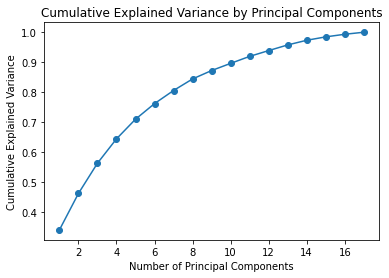

Number of components explaining 85% of variance: 9


/Users/nivharel/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nivharel/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nivharel/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nivharel/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

                      Model Parameters  Silhouette Score  \
0                    KMeans       (2,)          0.303011   
1                    KMeans       (3,)          0.269264   
2                    KMeans       (4,)          0.255278   
3                    KMeans       (5,)          0.275142   
4                    KMeans       (6,)          0.291621   
5                    KMeans       (7,)          0.300514   
6                    KMeans       (8,)          0.310098   
7                    KMeans       (9,)          0.327282   
8                    KMeans      (10,)          0.339633   
9                    DBSCAN   (0.3, 5)          0.533523   
10                   DBSCAN  (0.3, 10)          0.310104   
11                   DBSCAN   (0.5, 5)          0.548127   
12                   DBSCAN  (0.5, 10)          0.317284   
13                   DBSCAN   (0.7, 5)          0.495222   
14                   DBSCAN  (0.7, 10)          0.321830   
15  AgglomerativeClustering       (2,)  

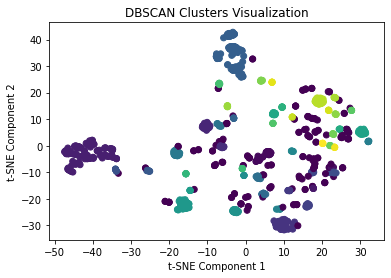

In [48]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS
from sklearn.svm import OneClassSVM
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from itertools import product


data_scaled= final_df

# Dimensionality Reduction with PCA -- TODO: PROBLEM WITH PCA ON CATEGORIAL COLUMNS..
pca = PCA()
pca_data = pca.fit_transform(data_scaled)
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure()
plt.plot(range(1, len(explained_variance)+1), np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Select the number of components that explain at least 85% of variance
num_components = np.argmax(np.cumsum(explained_variance) >= 0.85) + 1
print(f'Number of components explaining 85% of variance: {num_components}')

# Reduce dimensions using PCA
pca_data_reduced = pca_data[:, :num_components]
final_df = pd.DataFrame(pca_data_reduced, columns=[f'PC{i+1}' for i in range(num_components)])

# Additional Dimensionality Reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(pca_data_reduced)

# Define clustering models with hyperparameter tuning
model_params = {
    'KMeans': {'n_clusters': range(2, 11)},
    'DBSCAN': {'eps': [0.3, 0.5, 0.7], 'min_samples': [5, 10]},
    'AgglomerativeClustering': {'n_clusters': range(2, 11)},
    'GaussianMixture': {'n_components': range(2, 11)},
    'OPTICS': {'min_samples': [5, 10]}
}

results = []
for model_name, params in model_params.items():
    for param_combination in product(*params.values()):
        try:
            if model_name == 'KMeans':
                model = KMeans(n_clusters=param_combination[0], random_state=42)
            elif model_name == 'DBSCAN':
                model = DBSCAN(eps=param_combination[0], min_samples=param_combination[1])
            elif model_name == 'AgglomerativeClustering':
                model = AgglomerativeClustering(n_clusters=param_combination[0])
            elif model_name == 'GaussianMixture':
                model = GaussianMixture(n_components=param_combination[0], random_state=42)
            elif model_name == 'OPTICS':
                model = OPTICS(min_samples=param_combination[0])
            
            labels = model.fit_predict(pca_data_reduced)
            if len(set(labels)) > 1:
                silhouette = silhouette_score(pca_data_reduced, labels)
                davies_bouldin = davies_bouldin_score(pca_data_reduced, labels)
                calinski_harabasz = calinski_harabasz_score(pca_data_reduced, labels)
            else:
                silhouette, davies_bouldin, calinski_harabasz = -1, -1, -1
            
            results.append({
                'Model': model_name,
                'Parameters': param_combination,
                'Silhouette Score': silhouette,
                'Davies-Bouldin Score': davies_bouldin,
                'Calinski-Harabasz Score': calinski_harabasz
            })
        except Exception as e:
            print(f'Error with {model_name} and params {param_combination}: {e}')

# Display model evaluation results
results_df = pd.DataFrame(results)
print(results_df)

# Select the best model based on Silhouette Score
best_model = results_df.sort_values(by='Silhouette Score', ascending=False).iloc[0]
print(f"Best Model: {best_model['Model']} with Parameters: {best_model['Parameters']} and Silhouette Score: {best_model['Silhouette Score']}")

# Train the best model
best_model_name = best_model['Model']
best_params = best_model['Parameters']
if best_model_name == 'KMeans':
    final_model = KMeans(n_clusters=best_params[0], random_state=42)
elif best_model_name == 'DBSCAN':
    final_model = DBSCAN(eps=best_params[0], min_samples=best_params[1])
elif best_model_name == 'AgglomerativeClustering':
    final_model = AgglomerativeClustering(n_clusters=best_params[0])
elif best_model_name == 'GaussianMixture':
    final_model = GaussianMixture(n_components=best_params[0], random_state=42)
elif best_model_name == 'OPTICS':
    final_model = OPTICS(min_samples=best_params[0])

final_labels = final_model.fit_predict(pca_data_reduced)
final_df['Cluster'] = final_labels

# Visualize the final clusters
plt.figure()
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=final_df['Cluster'], cmap='viridis')
plt.title(f'{best_model_name} Clusters Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


